In [20]:
import matplotlib.pyplot as plt

from data_reader import read_data
from grid_reader import read_grids
from grid_mapper import map_to_taxiZones
from visit_counter import count_visits

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Step1) read mobile phone data and convert it to geodata

In [3]:
file_name = 'data/poi_NY_initial.csv'
geo_data = read_data(file_name)
geo_data.head(5)

,placekey,parent_placekey,safegraph_brand_ids,location_name,brands,store_id,top_category,sub_category,naics_code,latitude,...,related_same_month_brand,popularity_by_hour,popularity_by_day,device_type,normalized_visits_by_state_scaling,normalized_visits_by_region_naics_visits,normalized_visits_by_region_naics_visitors,normalized_visits_by_total_visits,normalized_visits_by_total_visitors,geometry
0,zzw-223@627-s8r-75z,NaN,NaN,Friday Spa,NaN,NaN,Personal Care Services,Other Personal Care Services,812199.0,40.763570,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,POINT (-73.98949 40.76357)
1,26t-222@627-s8k-28v,NaN,NaN,Bromley Coats,NaN,NaN,Clothing Stores,NaN,4481.0,40.751652,...,"{""Dunkin'"":64,""Stop & Shop"":27,""McDonald's"":27...","[0,0,0,0,0,0,0,0,4,8,8,9,10,10,7,6,6,6,2,1,1,1...","{""Monday"":5,""Tuesday"":2,""Wednesday"":1,""Thursda...","{""android"":8,""ios"":4}",344.907760,0.000033,0.000046,2.205828e-07,5.826137e-07,POINT (-73.98954 40.75165)
2,227-223@627-s4n-f9f,NaN,SG_BRAND_40d0513948f9d804,Chase ATM,Chase ATM,NaN,Depository Credit Intermediation,Commercial Banking,522110.0,40.771845,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,POINT (-73.96486 40.77184)
3,zzw-22g@627-wbz-skf,NaN,SG_BRAND_171f9c99bab14f52,The Great American Bagel,The Great American Bagel,62,Restaurants and Other Eating Places,Limited-Service Restaurants,722513.0,40.710502,...,"{""McDonald's"":47,""Starbucks"":30,""Walmart"":29,""...","[0,0,0,0,1,4,3,4,2,2,3,7,18,25,20,13,8,5,3,4,2...","{""Monday"":12,""Tuesday"":6,""Wednesday"":3,""Thursd...","{""android"":55,""ios"":12}",1989.852462,0.000009,0.000014,1.272593e-06,3.707542e-06,POINT (-74.00886 40.71050)
4,225-22f@627-s8q-zvf,NaN,NaN,GCMP tv,NaN,NaN,Radio and Television Broadcasting,NaN,5151.0,40.752270,...,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,POINT (-73.97451 40.75227)


### Extract subset of mobile data of those vissited the target region, i.g., Hudson Yards

# Step 2) Read grids: Cencus Block Group grids and Taxi zones

we have 6758 unique cbg zones in New York City in all 5 boroughs


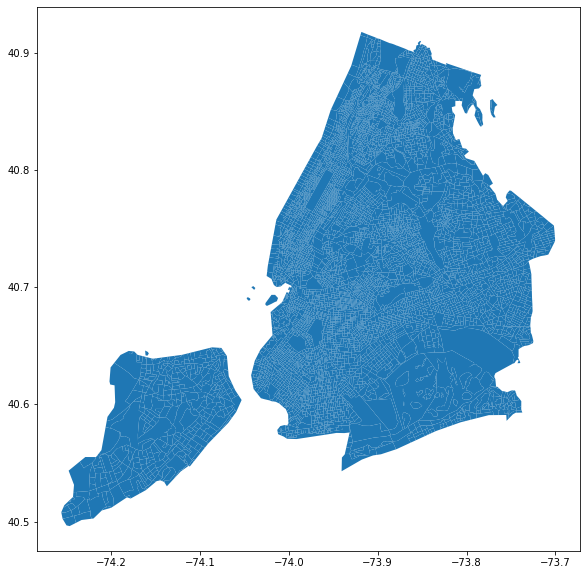

In [6]:
cbg_grids_name = "cb_2021_36_bg_500k.shp"
nyc_geoids, cbgs_nyc = read_grids(cbg_grids_name, grid_name = 'Cencus Blocks')


we have 263 unique taxi zones


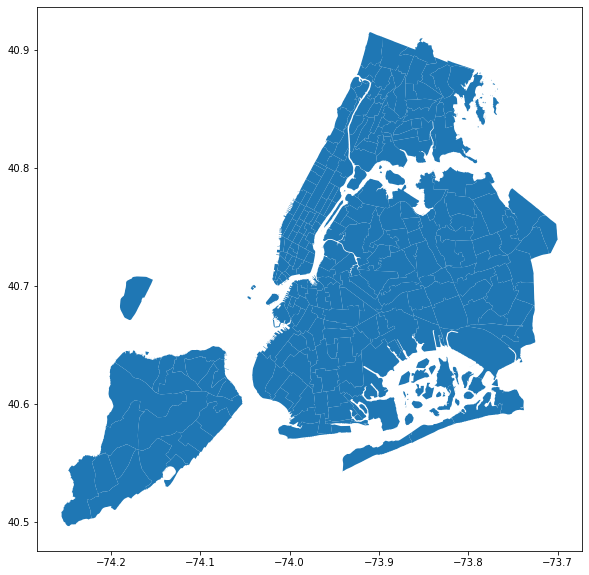

In [8]:
taxi_grids_name = "geo_export_e612eba5-03f4-49f0-a0ac-528f1c3802b8.shp"
taxi_zones = read_grids(taxi_grids_name, grid_name = 'taxi zones')

# Step 3) Grid coarsening: Cencus Block Group grids onto Taxi zones

In [ ]:
cbgs_nyc = map_to_taxiZones(cbgs_nyc, taxi_zones)

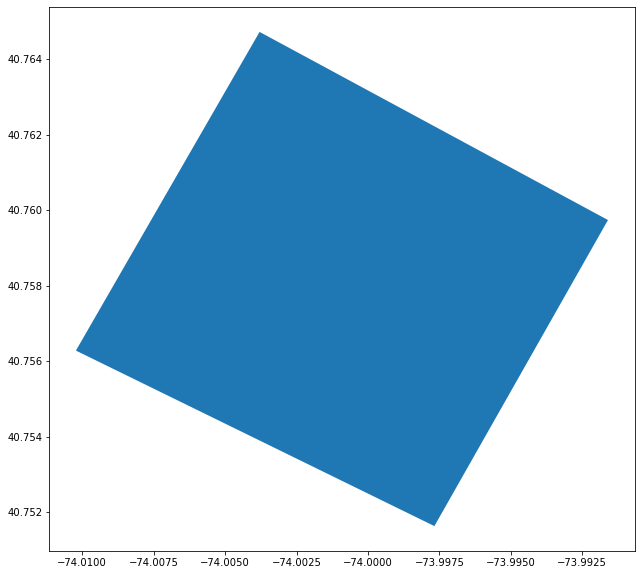

In [17]:
grids_name = "Hudson_Yards_Cut.shp"
attraction_zone = read_grids(grids_name, grid_name = 'attraction')


<AxesSubplot:>

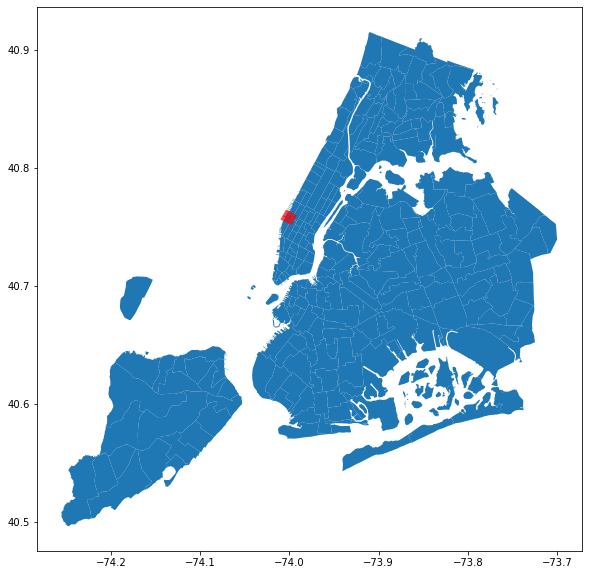

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
taxi_zones.plot(ax=ax) #, column='objectid'
attraction_zone.plot(ax=ax, color='red', alpha=0.7)

In [ ]:
visits = count_visits(attraction_zone, nyc_geoids)